In [1]:
from wilds import get_dataset
from wilds.common.data_loaders import get_train_loader
import torchvision.transforms as transforms

import argparse
import os
import shutil
import time

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from resnet_ms import ResNet18
import wandb
import numpy as np
import random

/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = torch.nn.DataParallel(ResNet18(num_classes=2, num_channels=8))
model.cuda()

run_name = "poverty_49"
checkpoint_name = "data/"+run_name+"/best.th"

print("=> loading checkpoint '{}'".format(checkpoint_name))
checkpoint = torch.load(checkpoint_name)
model.load_state_dict(checkpoint['state_dict'])

model.eval()

/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/torch/nn/parallel/data_parallel.py:32: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 0 which
    has less than 75% of the memory or cores of GPU 1. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


=> loading checkpoint 'data/poverty_49/best.th'


DataParallel(
  (module): ResNet18(
    (conv1): Conv2d(8, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [61]:
checkpoint['best_prec1']

-0.48498005771636965

In [62]:
checkpoint["state_dict"].keys()

odict_keys(['module.conv1.weight', 'module.bn1.weight', 'module.bn1.bias', 'module.bn1.running_mean', 'module.bn1.running_var', 'module.bn1.num_batches_tracked', 'module.layer1.0.conv1.weight', 'module.layer1.0.bn1.weight', 'module.layer1.0.bn1.bias', 'module.layer1.0.bn1.running_mean', 'module.layer1.0.bn1.running_var', 'module.layer1.0.bn1.num_batches_tracked', 'module.layer1.0.conv2.weight', 'module.layer1.0.bn2.weight', 'module.layer1.0.bn2.bias', 'module.layer1.0.bn2.running_mean', 'module.layer1.0.bn2.running_var', 'module.layer1.0.bn2.num_batches_tracked', 'module.layer1.1.conv1.weight', 'module.layer1.1.bn1.weight', 'module.layer1.1.bn1.bias', 'module.layer1.1.bn1.running_mean', 'module.layer1.1.bn1.running_var', 'module.layer1.1.bn1.num_batches_tracked', 'module.layer1.1.conv2.weight', 'module.layer1.1.bn2.weight', 'module.layer1.1.bn2.bias', 'module.layer1.1.bn2.running_mean', 'module.layer1.1.bn2.running_var', 'module.layer1.1.bn2.num_batches_tracked', 'module.layer2.0.conv1

In [3]:
dataset = get_dataset(dataset="poverty", download=False)

# Get the training set
train_data = dataset.get_subset(
    "train",
    # transform=transforms.Compose(
    # [transforms.ToTensor()]
# ),
)


test_data = dataset.get_subset(
    "id_val")


# Get the validation set
val_data1 = dataset.get_subset(
    "val",
#     transform=transforms.Compose(
#     [transforms.ToTensor()]
# ),
)

# Get the test set
val_data2 = dataset.get_subset(
    "test",
#     transform=transforms.Compose(
#     [transforms.ToTensor()]
# ),
)

train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=64, shuffle=True,
    num_workers=4, pin_memory=True)

test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=64, shuffle=True,
    num_workers=4, pin_memory=True)

val_loader1 = torch.utils.data.DataLoader(
    val_data1,
    batch_size=64, shuffle=True,
    num_workers=4, pin_memory=True)

val_loader2 = torch.utils.data.DataLoader(
    val_data2,
    batch_size=64, shuffle=True,
    num_workers=4, pin_memory=True)

In [5]:
# from scipy.stats import pearsonr
# with torch.no_grad():
#     for i, (input, target, metadata) in enumerate(val_loader2):
#         input = input.cuda()
#         target = target.cuda().squeeze()

#         output = model(input)


#         mean = output[:, 0]
#         r = pearsonr(mean.squeeze().detach().cpu().numpy(), target.squeeze().detach().cpu().numpy())[0]
#         print(r)

        

0.8076406756231705
0.8506613152758662
0.907470547513888
0.8570272225364856
0.7856436768385263
0.7931312469587244
0.8663741161297618
0.818302225573198
0.8807345451728803
0.843209515298004
0.8063188630147633
0.8157434204012073
0.8818312254336493
0.8024089468612332
0.8300352071276811
0.830408713302279
0.8891489592219803
0.8517901411421036
0.8074085651859294
0.7903861511512041
0.8244763772282477
0.7967906696017584
0.8560458406137634
0.7736301663730906
0.8314216765809523
0.799408465794883
0.8440769321087208
0.8304296655464661
0.8058606635872378
0.8696468424923275
0.8511184102897702
0.88569030001028
0.7724025547657292
0.8069678082775704
0.8385945600639853
0.8844927935051508
0.8469089515956316
0.8669945455185355
0.8114557732662369
0.8385266628551437
0.8976281291175537
0.8191204701143158
0.7504934865472879
0.8526970028473717
0.7959994725116231
0.8440441671358732
0.7995045119757582
0.827860452216336
0.8452133847375268
0.719888777647754
0.8595906066082006
0.8437883649432628
0.8282887539606594
0.

In [65]:
ys_train  = train_data.dataset._y_array[train_data.indices]

In [66]:
mean = torch.mean(ys_train.squeeze())
std = torch.std(ys_train)

In [67]:
mean

tensor(0.1227)

In [68]:
std

tensor(0.8100)

In [6]:
from trainer_wilds import AverageMeter




def get_avg_loss_kl(loader, model):
    losses = AverageMeter()
    KLs = AverageMeter()
    mses = AverageMeter()
    criterion = nn.GaussianNLLLoss().cuda()
    criterion2 = nn.MSELoss().cuda()
    variances = AverageMeter()

    with torch.no_grad():
        for i, (input, target, metadata) in enumerate(loader):
            input = input.cuda()
            target = target.cuda().squeeze()

            output = model(input)


            mean = output[:, 0]
            log_var = torch.clip(output[:, 1], -20, 2)
            var = torch.exp(log_var)
            variances.update(var.mean().item(), input.size(0))

            loss = criterion(mean, target, var)
            losses.update(loss.item(), input.size(0))

            mse = criterion2(mean, target)
            mses.update(mse.item(), input.size(0))

            KL = torch.log(var.sqrt()/0.8100) + (0.8100**2 + (0.1227-mean)**2)/(2*var)
            KLs.update(KL.mean().item(), input.size(0))
    return losses.avg, mses.avg, KLs.avg, variances.avg




In [7]:
loss_train, mse_train, kl_train, var_train = get_avg_loss_kl(test_loader, model)
print(loss_train)
print(mse_train)
print(kl_train)
print(var_train)

-0.4849800848960876
0.17232677459716797
7.654972785949707
0.14352617120742797


In [8]:
test_countries = ['benin', 'burkina_faso', 'guinea', 'sierra_leone', 'tanzania', 'angola', 'cote_d_ivoire', 'ethiopia', 'mali', 'rwanda']

losses_all = []
mses_all = []
kls_all = []
vars_all = []
for country in test_countries:
    country_metadata_idx = val_data1._metadata_map["country"].index(country)
    country_idxs = np.where(val_data1.dataset._metadata_array[:, 2] == country_metadata_idx)
    country_data = torch.utils.data.Subset(dataset, country_idxs[0])
    country_loader = torch.utils.data.DataLoader(
        country_data,
        batch_size=64, shuffle=True,
        num_workers=4, pin_memory=True)
    loss, mse, kl, var = get_avg_loss_kl(country_loader, model)
    losses_all.append(loss)
    mses_all.append(mse)
    kls_all.append(kl)
    vars_all.append(var)


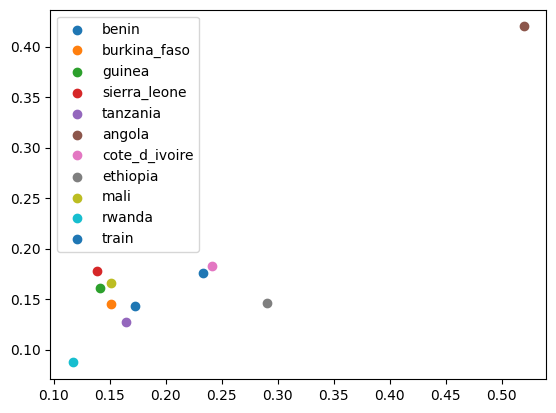

In [13]:
import matplotlib.pyplot as plt
for i in range(len(test_countries)):
    plt.scatter([mses_all[i]], [vars_all[i]], label=test_countries[i])
plt.scatter([mse_train], [var_train], label="train")
# plt.plot(np.arange(0.1, 0.6, 0.1), np.arange(0.1, 0.6, 0.1))
plt.legend()

In [113]:
model = torch.nn.DataParallel(ResNet18(num_classes=2, num_channels=8))
model.cuda()

run_name = "poverty_50"
checkpoint_name = "data/"+run_name+"/best.th"

print("=> loading checkpoint '{}'".format(checkpoint_name))
checkpoint = torch.load(checkpoint_name)
model.load_state_dict(checkpoint['state_dict'])

model.eval()

/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/torch/nn/parallel/data_parallel.py:32: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 0 which
    has less than 75% of the memory or cores of GPU 1. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


=> loading checkpoint 'data/poverty_50/best.th'


DataParallel(
  (module): ResNet18(
    (conv1): Conv2d(8, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [114]:
# print(loss_train)
# print(mse_train)
# print(kl_train)
# print(var_train)

In [14]:
test_countries = ['train', 'benin', 'burkina_faso', 'guinea', 'sierra_leone', 'tanzania', 'angola', 'cote_d_ivoire', 'ethiopia', 'mali', 'rwanda']

run_names = ["poverty_49", "poverty_50", "poverty_51"]

losses_all_seeds = []
mses_all_seeds = []
kls_all_seeds = []
vars_all_seeds = []

for run_name in run_names:
    model = torch.nn.DataParallel(ResNet18(num_classes=2, num_channels=8))
    model.cuda()

    checkpoint_name = "data/"+run_name+"/best.th"

    print("=> loading checkpoint '{}'".format(checkpoint_name))
    checkpoint = torch.load(checkpoint_name)
    model.load_state_dict(checkpoint['state_dict'])

    model.eval()

    losses_all = []
    mses_all = []
    kls_all = []
    vars_all = []

    for country in test_countries:
        if country == "train":
            loss, mse, kl, var = get_avg_loss_kl(test_loader, model)
        else:
            country_metadata_idx = val_data1._metadata_map["country"].index(country)
            country_idxs = np.where(val_data1.dataset._metadata_array[:, 2] == country_metadata_idx)
            country_data = torch.utils.data.Subset(dataset, country_idxs[0])
            country_loader = torch.utils.data.DataLoader(
                country_data,
                batch_size=64, shuffle=True,
                num_workers=4, pin_memory=True)
            loss, mse, kl, var = get_avg_loss_kl(country_loader, model)
        losses_all.append(loss)
        mses_all.append(mse)
        kls_all.append(kl)
        vars_all.append(var)
    losses_all_seeds.append(losses_all)
    mses_all_seeds.append(mses_all)
    kls_all_seeds.append(kls_all)
    vars_all_seeds.append(vars_all)


=> loading checkpoint 'data/poverty_49/best.th'


/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/torch/nn/parallel/data_parallel.py:32: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 0 which
    has less than 75% of the memory or cores of GPU 1. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


=> loading checkpoint 'data/poverty_50/best.th'
=> loading checkpoint 'data/poverty_51/best.th'


In [15]:
losses_all_seeds = np.array(losses_all_seeds)
mses_all_seeds = np.array(mses_all_seeds)
kls_all_seeds = np.array(kls_all_seeds)
vars_all_seeds = np.array(vars_all_seeds)

Text(0, 0.5, 'NLL')

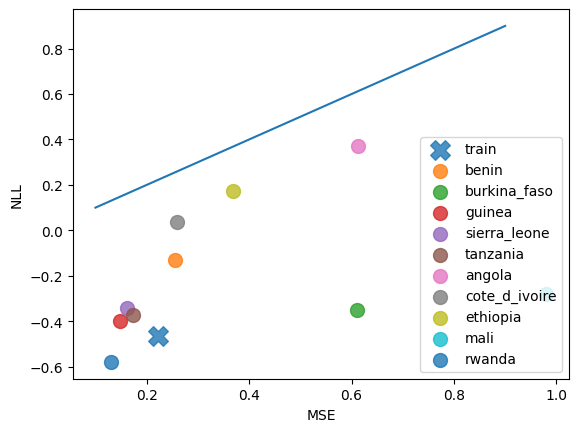

In [28]:

for i in range(len(test_countries)):
    if i==0:
        plt.scatter([mses_all_seeds.mean(axis=0)[i]], [(losses_all_seeds.mean(axis=0)[i])], marker = 'X', label=test_countries[i], alpha=0.8, s=200)
    else:
        plt.scatter([mses_all_seeds.mean(axis=0)[i]], [(losses_all_seeds.mean(axis=0)[i])], label=test_countries[i], alpha=0.8, s=100)
plt.plot(np.arange(0.1, 1, 0.1), np.arange(0.1, 1, 0.1))
plt.legend()
plt.xlabel("MSE")
plt.ylabel("NLL")

Text(0, 0.5, 'KL')

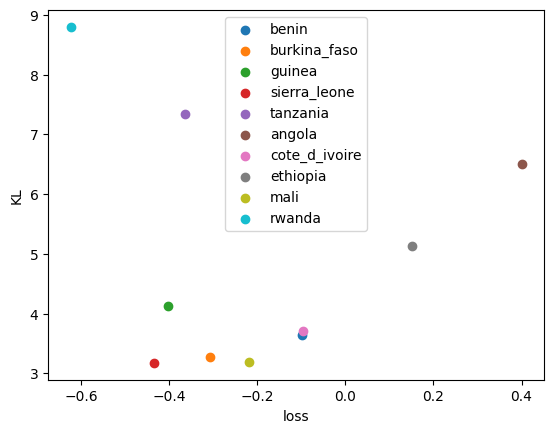

In [122]:
loss_train_mean = (loss_train + loss_train2)/2
var_train_mean = (var_train + var_train2)/2
kl_train_mean = (kl_train + kl_train2)/2

losses_all_mean = []
vars_all_mean = []
kl_all_mean = []
for i in range(len(test_countries)):
    losses_all_mean.append((losses_all[i] + losses_all2[i])/2)
    vars_all_mean.append((vars_all[i] + vars_all2[i])/2)
    kl_all_mean.append((kls_all[i] + kls_all2[i])/2)

for i in range(len(test_countries)):
    plt.scatter([losses_all_mean[i]], [(kl_all_mean[i])], label=test_countries[i])
# plt.scatter([loss_train_mean], [kl_train_mean], label="train")
plt.legend()
plt.xlabel("loss")
plt.ylabel("KL")

In [ ]:
# open a picke file name file.pkl


# with open('data/poverty_50/losses_all.pkl', 'wb') as f:
#     pickle.dump(losses_all, f)
# with open('data/poverty_50/vars_all.pkl', 'wb') as f:


# val data structure
# data [0] is imgs, data[1] is labels
# data [_][i] corresponds to classes(?), i_max = 15
# data [_][i][j] is image  (128 x 128) or label (3), j_max  = 100
